In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
def run_nn_alt(X, y):
  X_list = X.iloc[:, 0].tolist()

  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(X_list)
  total_words = len(tokenizer.word_index) + 1

  sequences = tokenizer.texts_to_sequences(X_list)
  padded_sequences = pad_sequences(sequences)

  x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.25, random_state=0)

  print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

  # Build the model
  # refine these params later lol uh....
  embedding_dim = 16
  model = Sequential([
        Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=padded_sequences.shape[1]),
        LSTM(100),
        Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(x_train, y_train.values.ravel(), epochs=10, validation_data=(x_test, y_test))

  print(f"Test Loss: {history.history['val_loss'][-1]}, Test Accuracy: {history.history['val_accuracy'][-1]}")

  return history

In [ ]:
def run_nn(X, y):
  # X_list = X.iloc[:, 0].tolist()

  # tokenizer = Tokenizer()
  # tokenizer.fit_on_texts(X_list)
  # total_words = len(tokenizer.word_index) + 1

  # sequences = tokenizer.texts_to_sequences(X_list)
  # padded_sequences = pad_sequences(sequences)

  # x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.25, random_state=0)
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  n, d = np.shape(x_train)

  # Build the model
  # refine these params later lol uh....
  embedding_dim = 16
  model = Sequential([
        # Embedding(input_dim=num_features, output_dim=embedding_dim, input_length=padded_sequences.shape[1]),
        Embedding(input_dim=d, output_dim=embedding_dim, input_length=d),
        LSTM(100),
        Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(x_train, y_train.values.ravel(), epochs=10, validation_data=(x_test, y_test))

  print(f"Test Loss: {history.history['val_loss'][-1]}, Test Accuracy: {history.history['val_accuracy'][-1]}")

  return history

In [ ]:
def run_nn_2(X, y):
  # X_list = X.iloc[:, 0].tolist()

  # tokenizer = Tokenizer()
  # tokenizer.fit_on_texts(X_list)
  # total_words = len(tokenizer.word_index) + 1

  # sequences = tokenizer.texts_to_sequences(X_list)
  # padded_sequences = pad_sequences(sequences)

  # x_train, x_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.25, random_state=0)
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  n, d = np.shape(x_train)

  # Build the model
  # refine these params later lol uh....
  embedding_dim = 16
  model = Sequential([
        Dense(units=32, activation='relu'),
        Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(x_train, y_train.values.ravel(), epochs=10, validation_data=(x_test, y_test))

  print(f"Test Loss: {history.history['val_loss'][-1]}, Test Accuracy: {history.history['val_accuracy'][-1]}")

  return history

In [ ]:
def plot_accuracy(history):
  # Plot the epoch vs accuracy curve
  plt.figure()
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Accuracy Curve')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def plot_loss(history):
  # Plot the epoch vs loss curve
  plt.figure()
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Loss Curve')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/229/xys/t5nouns_x_per_speaker.csv').astype("str")
y = pd.read_csv('/content/drive/MyDrive/229/xys/y_per_speaker.csv')

In [ ]:
history = run_nn_2(X, y)

Epoch 1/10
17/17 [==============================] - 5s 16ms/step - loss: 0.6975 - accuracy: 0.4752 - val_loss: 0.6699 - val_accuracy: 0.7257
Epoch 2/10
17/17 [==============================] - 0s 5ms/step - loss: 0.6555 - accuracy: 0.7061 - val_loss: 0.6339 - val_accuracy: 0.7200
Epoch 3/10
17/17 [==============================] - 0s 6ms/step - loss: 0.6253 - accuracy: 0.7385 - val_loss: 0.6085 - val_accuracy: 0.7600
Epoch 4/10
17/17 [==============================] - 0s 6ms/step - loss: 0.6026 - accuracy: 0.7481 - val_loss: 0.5907 - val_accuracy: 0.7714
Epoch 5/10
17/17 [==============================] - 0s 6ms/step - loss: 0.5865 - accuracy: 0.7500 - val_loss: 0.5769 - val_accuracy: 0.7486
Epoch 6/10
17/17 [==============================] - 0s 6ms/step - loss: 0.5750 - accuracy: 0.7481 - val_loss: 0.5668 - val_accuracy: 0.7486
Epoch 7/10
17/17 [==============================] - 0s 5ms/step - loss: 0.5661 - accuracy: 0.7481 - val_loss: 0.5598 - val_accuracy: 0.7486
Epoch 8/10
17/17 [=

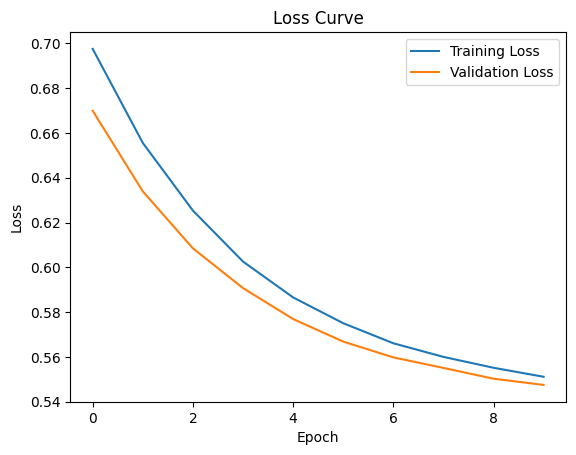

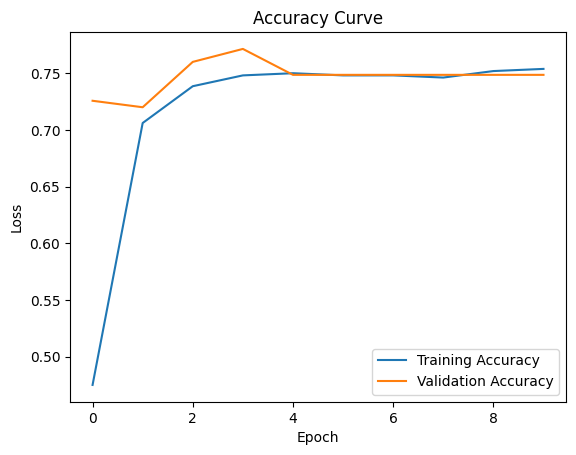

In [ ]:
plot_loss(history)
plot_accuracy(history)

In [ ]:
history = run_nn_alt(X, y)

Epoch 1/10
17/17 [==============================] - 8s 50ms/step - loss: 0.6770 - accuracy: 0.6851 - val_loss: 0.6521 - val_accuracy: 0.7371
Epoch 2/10
17/17 [==============================] - 0s 7ms/step - loss: 0.6275 - accuracy: 0.7271 - val_loss: 0.5943 - val_accuracy: 0.7371
Epoch 3/10
17/17 [==============================] - 0s 8ms/step - loss: 0.5860 - accuracy: 0.7271 - val_loss: 0.5776 - val_accuracy: 0.7371
Epoch 4/10
17/17 [==============================] - 0s 8ms/step - loss: 0.5895 - accuracy: 0.7271 - val_loss: 0.5761 - val_accuracy: 0.7371
Epoch 5/10
17/17 [==============================] - 0s 8ms/step - loss: 0.5906 - accuracy: 0.7271 - val_loss: 0.5794 - val_accuracy: 0.7371
Epoch 6/10
17/17 [==============================] - 0s 7ms/step - loss: 0.5864 - accuracy: 0.7271 - val_loss: 0.5763 - val_accuracy: 0.7371
Epoch 7/10
17/17 [==============================] - 0s 8ms/step - loss: 0.5870 - accuracy: 0.7271 - val_loss: 0.5761 - val_accuracy: 0.7371
Epoch 8/10
17/17 [=

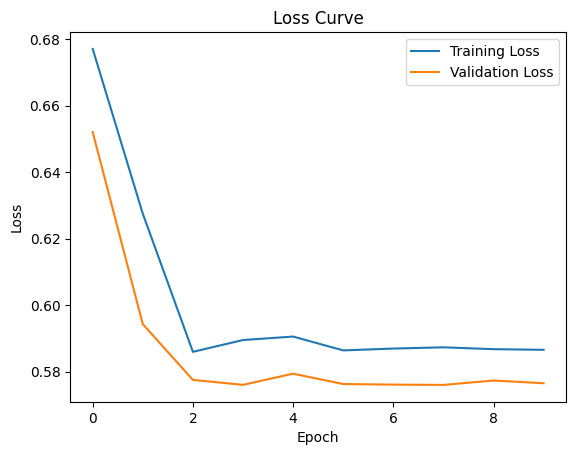

In [ ]:
plot_loss(history)

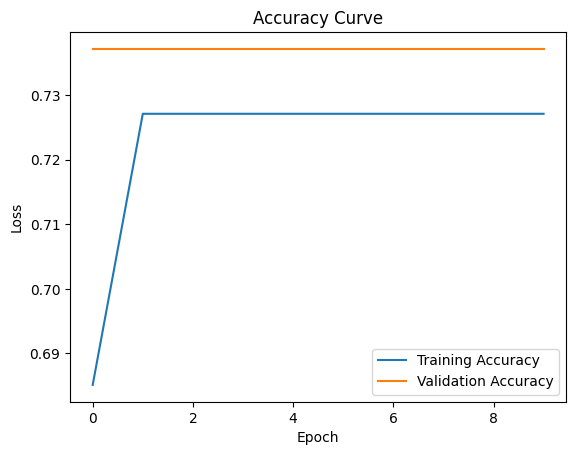

In [ ]:
plot_accuracy(history)

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/229/xys/t5adjs_x_per_speaker.csv').astype("str")
y = pd.read_csv('/content/drive/MyDrive/229/xys/y_per_speaker.csv')
history = run_nn_alt(X, y)

Epoch 1/10
17/17 [==============================] - 5s 86ms/step - loss: 0.6759 - accuracy: 0.7271 - val_loss: 0.6514 - val_accuracy: 0.7371
Epoch 2/10
17/17 [==============================] - 0s 12ms/step - loss: 0.6285 - accuracy: 0.7271 - val_loss: 0.5946 - val_accuracy: 0.7371
Epoch 3/10
17/17 [==============================] - 0s 14ms/step - loss: 0.5906 - accuracy: 0.7271 - val_loss: 0.5765 - val_accuracy: 0.7371
Epoch 4/10
17/17 [==============================] - 0s 13ms/step - loss: 0.5876 - accuracy: 0.7271 - val_loss: 0.5761 - val_accuracy: 0.7371
Epoch 5/10
17/17 [==============================] - 0s 14ms/step - loss: 0.5875 - accuracy: 0.7271 - val_loss: 0.5764 - val_accuracy: 0.7371
Epoch 6/10
17/17 [==============================] - 0s 14ms/step - loss: 0.5888 - accuracy: 0.7271 - val_loss: 0.5777 - val_accuracy: 0.7371
Epoch 7/10
17/17 [==============================] - 0s 15ms/step - loss: 0.5877 - accuracy: 0.7271 - val_loss: 0.5770 - val_accuracy: 0.7371
Epoch 8/10
17

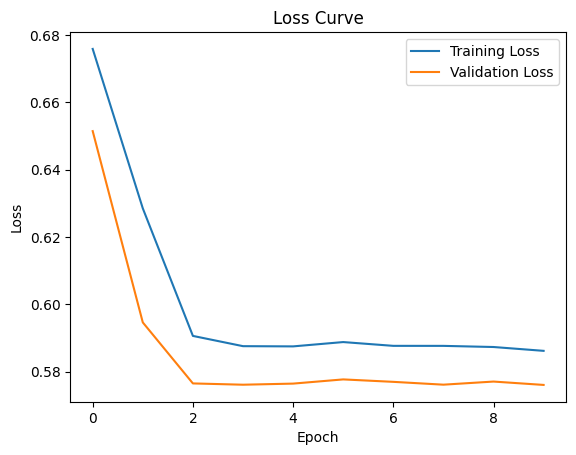

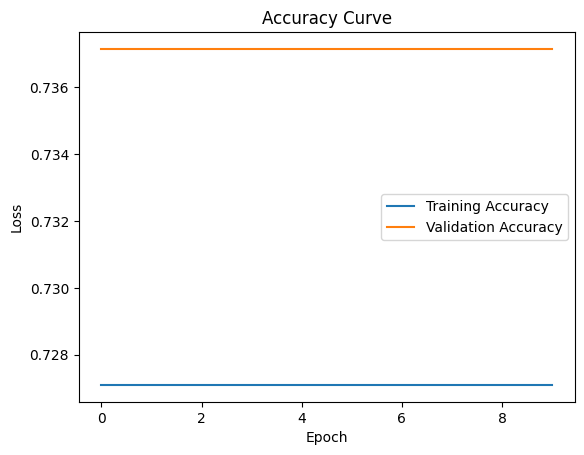

In [ ]:
plot_loss(history)
plot_accuracy(history)

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/229/xys/t5advs_x_per_speaker.csv').astype("str")
y = pd.read_csv('/content/drive/MyDrive/229/xys/y_per_speaker.csv')

In [ ]:
history = run_nn(X, y)

Epoch 1/10
17/17 [==============================] - 7s 55ms/step - loss: 0.6551 - accuracy: 0.7271 - val_loss: 0.5962 - val_accuracy: 0.7371
Epoch 2/10
17/17 [==============================] - 0s 14ms/step - loss: 0.5916 - accuracy: 0.7271 - val_loss: 0.5792 - val_accuracy: 0.7371
Epoch 3/10
17/17 [==============================] - 0s 11ms/step - loss: 0.5914 - accuracy: 0.7271 - val_loss: 0.5801 - val_accuracy: 0.7371
Epoch 4/10
17/17 [==============================] - 0s 9ms/step - loss: 0.5902 - accuracy: 0.7271 - val_loss: 0.5781 - val_accuracy: 0.7371
Epoch 5/10
17/17 [==============================] - 0s 14ms/step - loss: 0.5892 - accuracy: 0.7271 - val_loss: 0.5772 - val_accuracy: 0.7371
Epoch 6/10
17/17 [==============================] - 0s 11ms/step - loss: 0.5914 - accuracy: 0.7271 - val_loss: 0.5766 - val_accuracy: 0.7371
Epoch 7/10
17/17 [==============================] - 0s 9ms/step - loss: 0.5903 - accuracy: 0.7271 - val_loss: 0.5763 - val_accuracy: 0.7371
Epoch 8/10
17/1

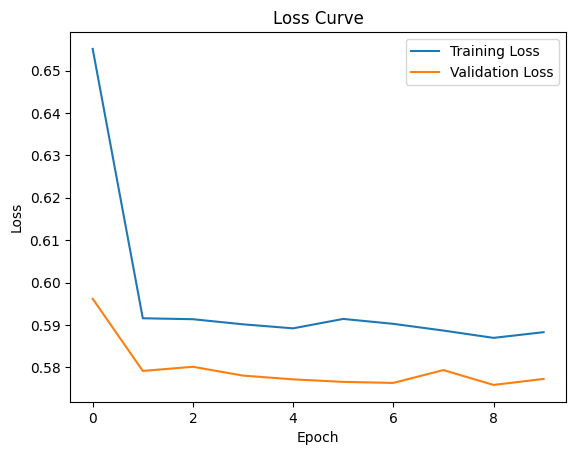

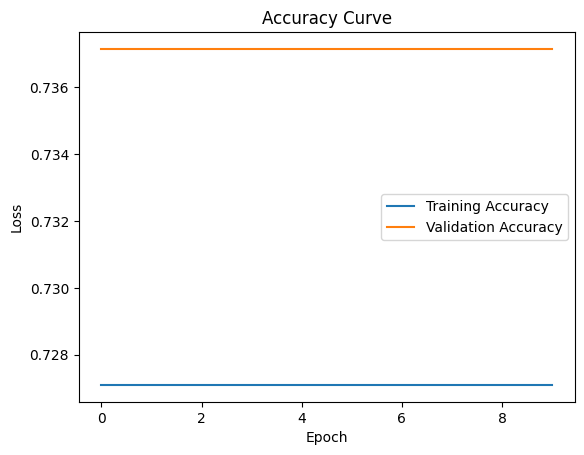

In [ ]:
plot_loss(history)
plot_accuracy(history)

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/229/xys/t5verbs_x_per_speaker.csv').astype("str")
y = pd.read_csv('/content/drive/MyDrive/229/xys/y_per_speaker.csv')
history = run_nn(X, y)

Epoch 1/10
17/17 [==============================] - 6s 98ms/step - loss: 0.6611 - accuracy: 0.7214 - val_loss: 0.6033 - val_accuracy: 0.7371
Epoch 2/10
17/17 [==============================] - 0s 11ms/step - loss: 0.5991 - accuracy: 0.7271 - val_loss: 0.5745 - val_accuracy: 0.7371
Epoch 3/10
17/17 [==============================] - 0s 21ms/step - loss: 0.5873 - accuracy: 0.7271 - val_loss: 0.5768 - val_accuracy: 0.7371
Epoch 4/10
17/17 [==============================] - 0s 9ms/step - loss: 0.5871 - accuracy: 0.7271 - val_loss: 0.5734 - val_accuracy: 0.7371
Epoch 5/10
17/17 [==============================] - 0s 11ms/step - loss: 0.5852 - accuracy: 0.7271 - val_loss: 0.5751 - val_accuracy: 0.7371
Epoch 6/10
17/17 [==============================] - 0s 8ms/step - loss: 0.5864 - accuracy: 0.7271 - val_loss: 0.5733 - val_accuracy: 0.7371
Epoch 7/10
17/17 [==============================] - 0s 11ms/step - loss: 0.5835 - accuracy: 0.7271 - val_loss: 0.5720 - val_accuracy: 0.7371
Epoch 8/10
17/1

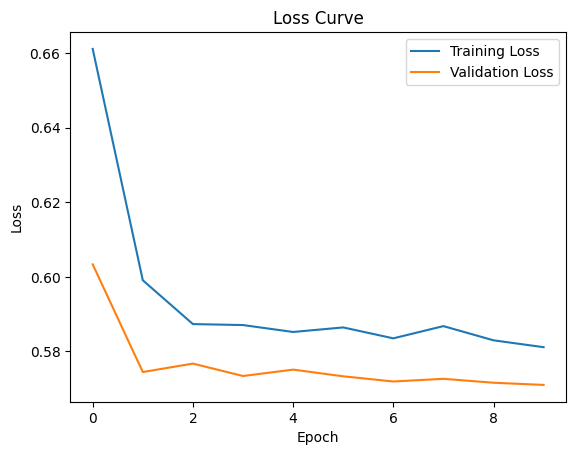

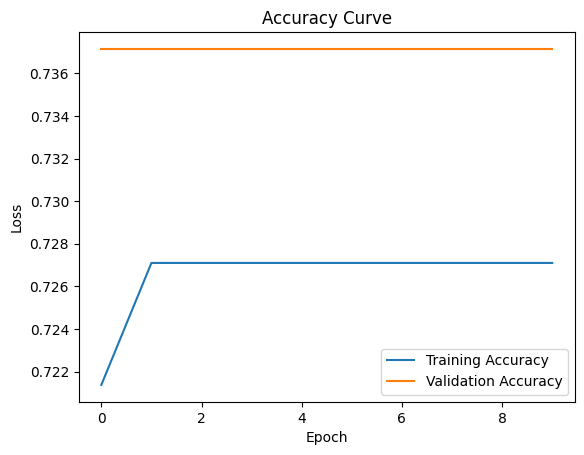

In [ ]:
plot_loss(history)
plot_accuracy(history)

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/229/xys/t10nouns_x_per_speaker.csv').astype("str")
y = pd.read_csv('/content/drive/MyDrive/229/xys/y_per_speaker.csv')

In [ ]:
history = run_nn(X, y)

Epoch 1/10
17/17 [==============================] - 5s 99ms/step - loss: 0.6453 - accuracy: 0.7271 - val_loss: 0.5786 - val_accuracy: 0.7371
Epoch 2/10
17/17 [==============================] - 0s 23ms/step - loss: 0.5928 - accuracy: 0.7271 - val_loss: 0.5791 - val_accuracy: 0.7371
Epoch 3/10
17/17 [==============================] - 1s 38ms/step - loss: 0.5964 - accuracy: 0.7271 - val_loss: 0.5791 - val_accuracy: 0.7371
Epoch 4/10
17/17 [==============================] - 0s 18ms/step - loss: 0.5892 - accuracy: 0.7271 - val_loss: 0.5779 - val_accuracy: 0.7371
Epoch 5/10
17/17 [==============================] - 1s 58ms/step - loss: 0.5901 - accuracy: 0.7271 - val_loss: 0.5785 - val_accuracy: 0.7371
Epoch 6/10
17/17 [==============================] - 0s 17ms/step - loss: 0.5927 - accuracy: 0.7271 - val_loss: 0.5793 - val_accuracy: 0.7371
Epoch 7/10
17/17 [==============================] - 0s 15ms/step - loss: 0.5861 - accuracy: 0.7271 - val_loss: 0.5776 - val_accuracy: 0.7371
Epoch 8/10
17

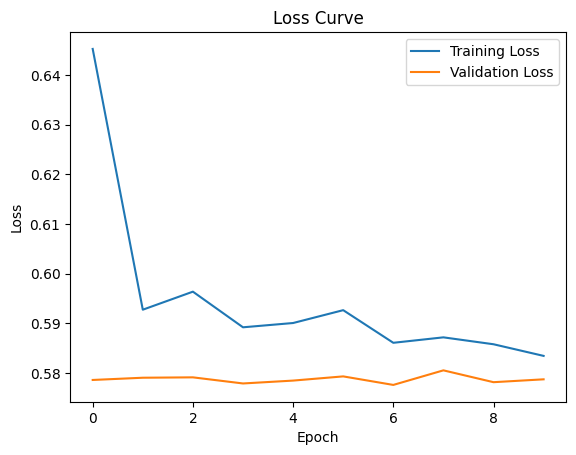

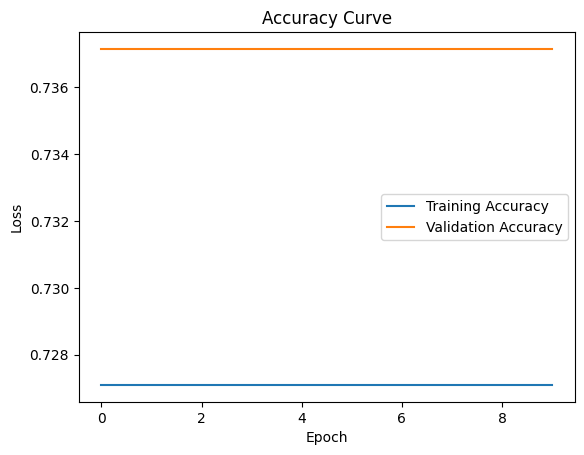

In [ ]:
plot_loss(history)
plot_accuracy(history)